In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("gplay.csv")

In [3]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone


In [4]:
df.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 10 columns):
Unnamed: 0        10841 non-null int64
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 847.0+ KB


In [6]:
# Remove unwanted column
df.drop("Unnamed: 0",axis=1,inplace=True)

### checking for nulls

In [7]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
dtype: int64

In [8]:
rating_mean = df["Rating"].mean()

In [9]:
df["Rating"].fillna(rating_mean,inplace=True)

In [10]:
df["Type"].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [11]:
df[df["Type"] == "0"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN


In [12]:
# Remove unwanted row
df.drop(10472,inplace=True)

In [13]:
df["Type"].fillna("Free",inplace=True)

In [14]:
df["Type"].value_counts()

Free    10040
Paid      800
Name: Type, dtype: int64

In [15]:
df["Content Rating"].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [16]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
dtype: int64

### Cleaning & String operations

In [17]:
df["Reviews"] = df["Reviews"].astype(int)

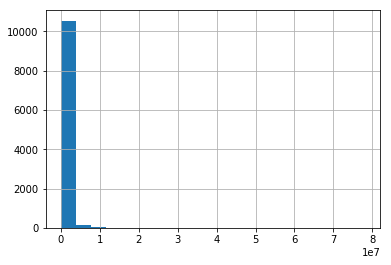

In [18]:
df["Reviews"].hist(bins=20)
plt.show()

In [19]:
df["Size"].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
16M                    149
26M                    149
25M                    143
20M                    139
21M                    138
10M                    136
24M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.3M                    68
2.5M                    68
                      ... 
691k                     1
865k                     1
728k                     1
54k                      1
270k                     1
454k                     1
2

In [20]:
def clean_size(x):
    if "k" in x:
        x = x.replace("k","")
        return float(x)/1024
    elif "M" in x:
        x = x.replace("M","")
        return float(x)
    elif x == "Varies with device":
        return np.nan
    else:
        return float(x)
    

In [21]:
df["Size"] = df["Size"].map(clean_size)

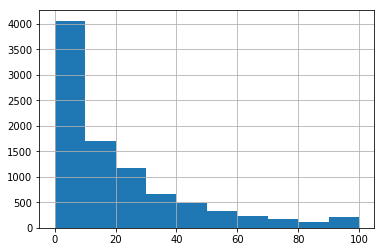

In [22]:
df["Size"].hist()
plt.show()

In [23]:
df["Installs"].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [24]:
df["Installs"] = df["Installs"].str.replace(",","")
df["Installs"] = df["Installs"].str.replace("+","")

In [25]:
df["Installs"].value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: Installs, dtype: int64

In [26]:
df["Installs"] = df["Installs"].astype(int)

In [27]:
df["Price"].value_counts()

0          10040
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$24.99         7
$7.99          7
$3.49          7
$29.99         7
$19.99         6
$5.49          6
$11.99         5
$12.99         5
$8.99          5
$6.49          5
$10.00         3
$1.00          3
$2.00          3
$16.99         3
$10.99         2
$33.99         2
           ...  
$3.61          1
$1.26          1
$109.99        1
$15.46         1
$1.50          1
$3.08          1
$19.90         1
$3.90          1
$1.75          1
$299.99        1
$37.99         1
$46.99         1
$14.00         1
$1.96          1
$30.99         1
$154.99        1
$74.99         1
$4.59          1
$389.99        1
$15.99         1
$1.04          1
$200.00        1
$1.76          1
$19.40         1
$4.77          1
$400.00        1
$1.59          1
$3.04         

In [28]:
df["Price"] = df["Price"].str.replace("$","")

In [29]:
df["Price"] = df["Price"].astype(float)

### Clean data frame

In [31]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone


# Analysis

### Q. Highest rated app

In [32]:
df["Rating"].max()

5.0

In [35]:
df_high_rated = df[df["Rating"] == 5.0]

In [40]:
df_high_rated["App"].head()

329                  Hojiboy Tojiboyev Life Hacks
612                 American Girls Mobile Numbers
615                                  Awake Dating
633                         Spine- The dating app
636    Girls Live Talk - Free Text and Video Chat
Name: App, dtype: object

### Q. Highest installed app

In [38]:
df["Installs"].max()

1000000000

In [41]:
df_high_installed = df[df["Installs"] == 1000000000]

In [42]:
df_high_installed["App"].head()

152                           Google Play Books
335    Messenger – Text and Video Chat for Free
336                          WhatsApp Messenger
338                Google Chrome: Fast & Secure
340                                       Gmail
Name: App, dtype: object

### Q. Highest reviewed app

In [43]:
df["Reviews"].max()

78158306

In [44]:
df_high_reviews = df[df["Reviews"] == 78158306]

In [46]:
df_high_reviews["App"].head()

2544    Facebook
Name: App, dtype: object

### Q. Expensive app

In [48]:
df["Price"].max()

400.0

In [49]:
df_high_price = df[df["Price"] == 400]

In [50]:
df_high_price["App"].head()

4367    I'm Rich - Trump Edition
Name: App, dtype: object